### Backtracking can be defined as a general algorithmic technique that considers searching every possible combination in order to solve a computational problem.

### Three types of problems in Backtracking
1. Decision Problem – In this, we search for a feasible solution.
2. Optimization Problem – In this, we search for the best solution.
3. Enumeration Problem – In this, we find all feasible solutions.

#### Problems that are solved using the backtracking have property such that these problems can only solved by trying every possible configuration and each configuration is tried once. Naive solution is to try all the possible configurations and output the configurations that follows given problem constrains. So, Backtracking in an optimization of Naive Solution where all the possible solutions and generated and tried.

# The Knight’s tour problem
Given a N*N board with the Knight placed on the first block of an empty board. Moving according to the rules of chess knight must visit each square exactly once. Print the order of each cell in which they are visited.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/ca/Knights-Tour-Animation.gif" width="300" align="center">

#### Output : 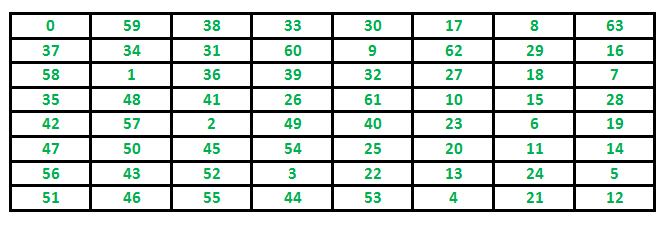

# Knight Walk

Given a square chessboard, the initial position of Knight and position of a target. Find out the minimum steps a Knight will take to reach the target position.If it cannot reach the target position return -1.

Note:
The initial and the target position co-ordinates of Knight have been given accoring to 1-base indexing.
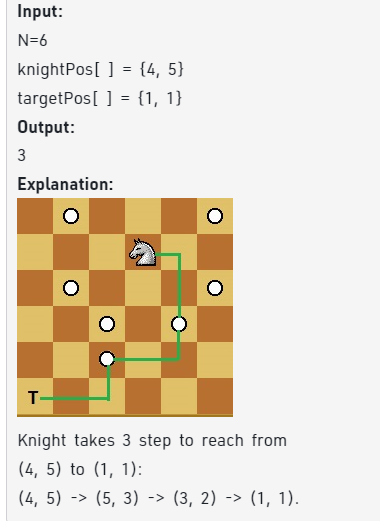


##### https://www.geeksforgeeks.org/top-20-backtracking-algorithm-interview-questions/

# Rat in a Maze problem - 1
Consider a rat placed at (0, 0) in a square matrix of order N * N. It has to reach the destination at (N - 1, N - 1). Find all possible paths that the rat can take to reach from source to destination. The directions in which the rat can move are 'U'(up), 'D'(down), 'L' (left), 'R' (right). Value 0 at a cell in the matrix represents that it is blocked and rat cannot move to it while value 1 at a cell in the matrix represents that rat can be travel through it.
Note: In a path, no cell can be visited more than one time. If the source cell is 0, the rat cannot move to any other cell.


In [1]:
# First Solution

class Solution:
    ans = None  # Class variable to store all paths
    
    def findPath(self, m, n):
        global ans
        ans = []  # Initialize ans to store paths
        
        visited = [[False for _ in range(n)] for _ in range(n)]  # Matrix to keep track of visited cells
        
        self.solver(visited, 0, 0, m, '')  # Start the solver from (0, 0) with an empty path
        
        return ans  # Return the list of all paths
        
    def solver(self, visited, i, j, mat, str1):
        n = len(mat)
        global ans
        
        # Check conditions for stopping exploration
        if i >= n or j >= n or i < 0 or j < 0 or visited[i][j] == True or mat[i][j] == 0 :
            return
        
        if i == n-1 and j == n-1 :
            ans += [str1]  # If we reached the destination, add the path to ans
            visited[i][j] = False  # Mark the cell as unvisited for backtracking
            return        

        visited[i][j] = True  # Mark the current cell as visited
        
        # Explore all four directions (U, D, L, R)
        self.solver(visited, i+1, j, mat, str1 + 'D')
        self.solver(visited, i, j+1, mat, str1 + 'R')
        self.solver(visited, i, j-1, mat, str1 + 'L')
        self.solver(visited, i-1, j, mat, str1 + 'U')
        
        visited[i][j] = False  # Mark the current cell as unvisited for backtracking


In [2]:
# sECOND Solution


class Solution:
    ans = None
    def findPath(self, m, n):
        # code here
        global ans
        ans = []
        
        if m[0][0] == 0 :
            return [-1]
        
        moves = [[1, 0, 'D'], [0, -1, 'L'], [-1, 0, 'U'], [0, 1, 'R']]
        
        visited = [[False for _ in range(n)] for _ in range(n)]
        visited[0][0] = True
        self.solver(0, 0, visited, m, '', moves)
        
        return ans
        
    def solver(self, i, j, visited, mat, string, moves):
        global ans
        n = len(mat)
        if i == n-1 and j == n-1:
            ans.append(string)
            return 
        
        for item in moves:
            
            new_i = i + item[0]
            new_j = j + item[1]
            str1 = string + item[2]
            if self.isValid(new_i, new_j, visited, mat):
                
                visited[new_i][new_j] = True
                
                if self.solver(new_i, new_j, visited, mat, str1, moves):
                    return True
            
                visited[new_i][new_j] = False
        
        return False
    
    def isValid(self, idx1, idx2, visited, mat):
        n = len(mat)
        if 0 <= idx1 and idx1 < n and 0 <= idx2 and idx2 < n and mat[idx1][idx2] == 1 and not visited[idx1][idx2] :
            
            return True
        
        return False


# N - Queen Problem:
The n-queens puzzle is the problem of placing n queens on a (n×n) chessboard such that no two queens can attack each other.
Given an integer n, find all distinct solutions to the n-queens puzzle. Each solution contains distinct board configurations of the n-queens’ placement, where the solutions are a permutation of [1,2,3..n] in increasing order, here the number in the ith place denotes that the ith-column queen is placed in the row with that number. For eg below figure represents a chessboard [3 1 4 2].
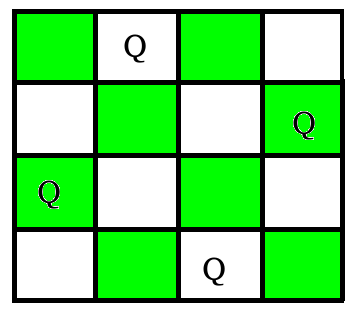

In [3]:
class Solution:
    def nQueen(self, n):
        ans = []  # To store all valid solutions
        self.solveNQueens(n, 0, [], ans)  # Start solving from the first row
        
        for i in range(len(ans)):
            for j in range(len(ans[0])):
                ans[i][j] += 1
        
        return ans
    
    def solveNQueens(self, n, row, curr, ans):
        # Base case: If all rows are filled, add the current solution to ans
        if row == n:
            ans.append(curr[:])  # Make a copy of current solution
            return
        
        for col in range(n):
            # Check if placing a queen at (row, col) is valid
            if self.isValid(curr, row, col):
                curr.append(col)  # Place the queen
                self.solveNQueens(n, row + 1, curr, ans)  # Move to the next row
                curr.pop()  # Backtrack: Remove the queen from the current row
            
    def isValid(self, curr, row, col):
        # Check if placing a queen at (row, col) is valid
        
        for prev_row in range(row):
            # Check if the current column has a queen in the same row
            
            if (curr[prev_row] == col) or (curr[prev_row] - prev_row == col - row) or (curr[prev_row] + prev_row == col + row):
                
               #\# Check if the current diagonal (\) has a queen\
               #(curr[prev_row] - prev_row == col - row) or 
               # Check if the current diagonal (/) has a queen\
               #(curr[prev_row] + prev_row == col + row):
                
                return False  # Conflict with previously placed queens
            
            
        return True  # No conflicts found
    
# Create an instance of the Solution class
sol = Solution()
# Call the nQueen method to get all distinct solutions for N-Queens problem
result = sol.nQueen(4)
# Print the result
print(result)

[[2, 4, 1, 3], [3, 1, 4, 2]]


# Word Break - Part 2
Given a string s and a dictionary of words dict of length n, add spaces in s to construct a sentence where each word is a valid dictionary word. Each dictionary word can be used more than once. Return all such possible sentences.

Follow examples for better understanding.

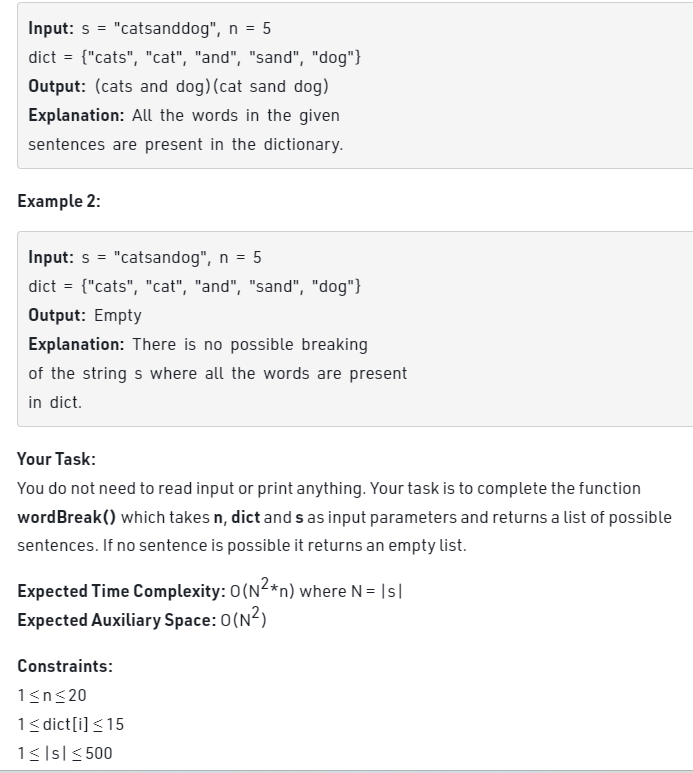

In [4]:
class Solution:
    def wordBreak(self, n, dict, s):
        # code here
        
        wordDict = dict
        
        self.ans = []
        self.solver(s, '', wordDict, 0)
        return self.ans

    def solver(self, s, line, wordDict, idx):
        if idx == len(s):
            self.ans.append(line[:-1])  # Remove the trailing space and add to ans
            return

        for i in range(idx, len(s)):
            word = s[idx:i + 1]
            if word in wordDict:
                self.solver(s, line + word + ' ', wordDict, i + 1)

# Remove Invalid Parenthesis
You are given a string S that contains parentheses and letters. You have to remove the minimum number of invalid parentheses to make the input string valid.

Return all the possible results in the sorted order.
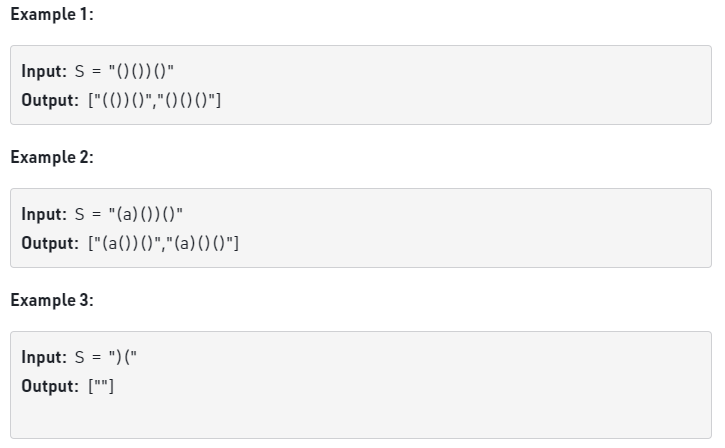

In [5]:
# Correct Approach

class Solution:
    global ans
    global memo
    def removeInvalidParentheses(self, s: str):
        global ans, memo
        
        if s == '()':
            return ["()"]
        
        ans = set()
        memo = set()
        nums = self.revingbrack(s)
        
        if nums == 0:
            return [s]
            
        self.solver(s, nums)
        
        return list(ans)
        
    
    def solver(self, string, idx):
        
        global ans, memo
        map1 = set(("(", ")", "[", "]", "{", "}"))
        
        if string in memo:
            return
        
        if self.revingbrack(string) == 0 and idx == 0:
            ans.add(string)
            return
        
        if idx == 0 or len(string) < 1:
            return 
        
        if len(string) > 1:
            for i in range(len(string)):
                
                if string[i] in map1:
                    str1 = string[:i] + string[i+1:]
                    if str1 not in memo:
                        self.solver(str1, idx-1)
                        memo.add(str1)
                    
                    
    def revingbrack(self, s):
        
        stack = []
        n = len(s)
        
        idx = 0
        
        map1 = set(("(", ")", "[", "]", "{", "}"))
        
        while stack or idx < n:
        
            if idx == n :
                break
            
            if s[idx] not in map1:
                idx += 1
            
            elif len(stack)>0 and (stack[-1] == '(' or stack[-1] == '[' or stack[-1] == '{' ):
                
                if s[idx] == ')' or s[idx] == ']' or s[idx] == '}':
                    stack.pop(-1)
                    idx += 1
                
                elif s[idx] in map1 :
                    
                    stack.append(s[idx])
                    idx += 1
                    
            else:
                
                stack.append(s[idx])
                idx += 1
                
        return len(stack)

# Sudoku solver
Given an incomplete Sudoku configuration in terms of a 9 x 9  2-D square matrix (grid[][]), the task is to find a solved Sudoku. For simplicity, you may assume that there will be only one unique solution.

A sudoku solution must satisfy all of the following rules:

1. Each of the digits 1-9 must occur exactly once in each row.
2. Each of the digits 1-9 must occur exactly once in each column.
3. Each of the digits 1-9 must occur exactly once in each of the 9 3x3 sub-boxes of the grid.

**NOTE:** Zeros in the grid indicates blanks, which are to be filled with some number between 1-9. You can not replace the element in the cell which is not blank.

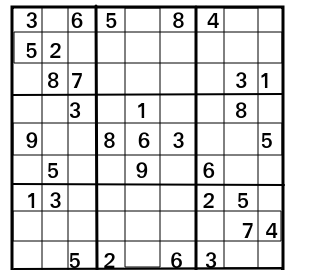
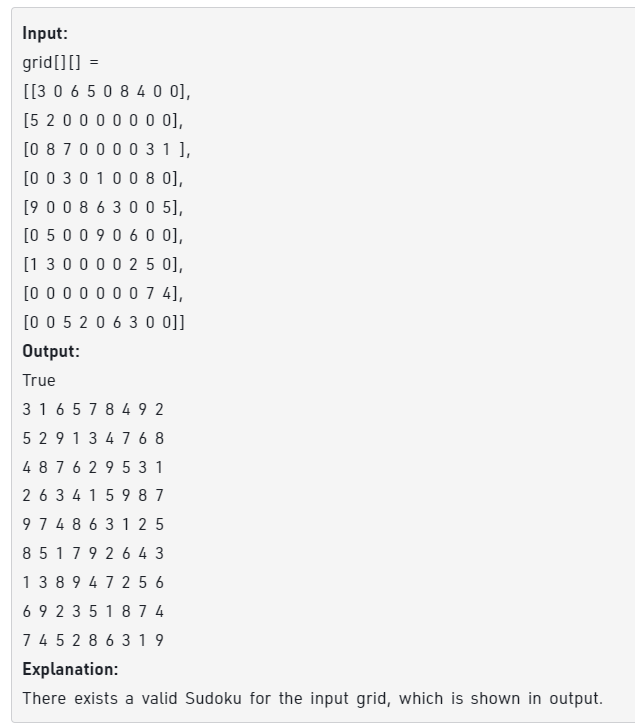
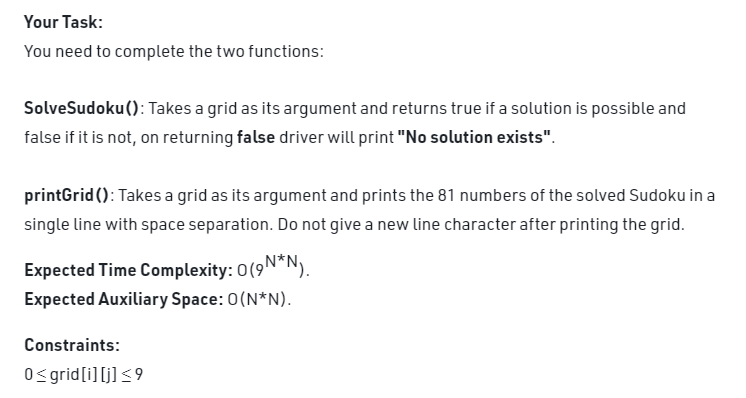

In [6]:

class Solution:
    #Function to find a solved Sudoku. 
    def SolveSudoku(self,grid):
        
        return self.solver(grid)
    
    def solver(self, mat):
        
        for i in range(9):
            for j in range(9):
                
                if mat[i][j] == 0:
                    
                    for k in range(1, 10):
                        
                        if self.isValid(i, j, k, mat):
                            mat[i][j] = k
                            
                            if self.solver(mat):
                                return True
                            
                            else:
                                
                                mat[i][j] = 0
                                
                    return False
                    
        return True
    
    #Function to print grids of the Sudoku.    
    def printGrid(self,arr):
        
        for i in range(9):
            for j in range(9):
                print(arr[i][j], end = " ")
        
        
        
    def isValid(self, idx1, idx2, ele, mat):
        

        for j in range(9):
            if mat[idx1][j] == ele :
                return False
            
            if mat[j][idx2] == ele:
                return False
            
            if mat[(idx1//3)*3 + j//3][(idx2//3)*3 + j%3] == ele:
                return False
        
        return True

# M-Coloring Problem
Given an undirected graph and an integer M. The task is to determine if the graph can be colored with at most M colors such that no two adjacent vertices of the graph are colored with the same color. Here coloring of a graph means the assignment of colors to all vertices. Print 1 if it is possible to colour vertices and 0 otherwise.
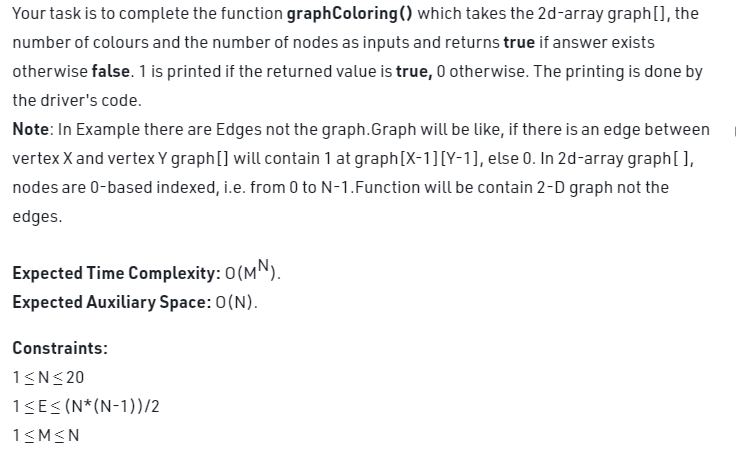

In [7]:
def graphColoring(graph, k, V):
    color = [0 for _ in range(V)]  # Initialize with 0 (first color)
    node = 0
    return colorPossible(graph, k, V, color, node)

def colorPossible(graph, k, V, color, i):
    if i == V:
        return True  # All vertices are colored, a valid coloring is found.
    else:
        for j in range(1, k + 1):  # Try colors from 1 to k (inclusive).
            if isColorFit(i, j, graph, V, color):
                color[i] = j  # Assign color j to vertex i if it's valid.
                if colorPossible(graph, k, V, color, i + 1):
                    return True  # Recursively try to color the next vertex.
                color[i] = 0  # Backtrack by setting the color back to 0.
    return False  # No valid coloring for the current configuration.

def isColorFit(i, j, graph, V, color):
    for x in range(V):
        if graph[i][x] == 1 and color[x] == j:
            return False  # If an adjacent vertex has the same color, return False.
    return True  # It's safe to assign color j to vertex i.

In [9]:
# 

def ispalin(s):
    
    if len(s) == 1 or len(s) == 0:
        return True
    
    elif s[0] != s[-1]:
        return False
    
    return ispalin(s[1:-1])

In [14]:
s = ''
ispalin(s)

True

# Partition Equal Sum
Given an array arr[] of size N, check if it can be partitioned into two parts such that the sum of elements in both parts is the same.


In [61]:
# User function Template for Python3

class Solution:
    ans = None
    def equalPartition(self, N, arr):
        # code here
        global ans 
        ans = 0
        n = N
        
        sum1 = 0
        for item in arr:
            sum1 += item
            
        
        if sum1 % 2 == 1 :
            return 'NO'
        
        self.solver(sum1//2, arr, 0, 0)
    
    
        if ans == 1:
            
            return 1
        
        return 0
            
    def solver(self, total, arr, sum1, idx):
        global ans

        if ans == 1 :
            return 
        
        if sum1 == total:
            ans = 1
        
        if idx == len(arr):
            return 
        
        self.solver(total, arr, sum1 + arr[idx], idx + 1)
        self.solver(total, arr, sum1, idx+1)
        
        return 

# Tug of War
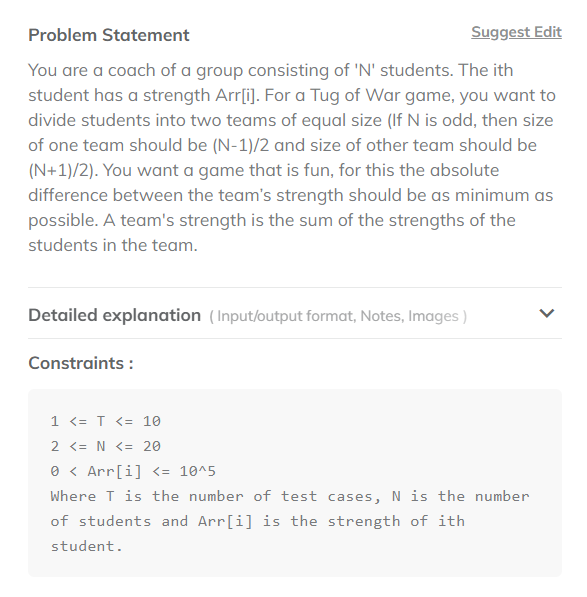

In [56]:
ans = None
def tugOfWar(arr, n):

    # write your code here
    global ans
    ans = [999999, [None], [None]]
    
    A = []
    B = []
    solver(arr, A, B, 0, 0, 0, n)
    
    return ans

def solver(arr, A, B, suma, sumb, idx, n):
    
    global ans
    
    if idx == n :
        
        if abs(sum(A)- sum(B)) <= ans[0] :
            ans[0] = abs(sum(A)- sum(B))
            ans[1][:] = A
            ans[2][:] = B
        return
    
    else:
        
        if len(A) < (n+1)//2:
            A += [arr[idx]]
            solver(arr, A, B, suma + arr[idx], sumb, idx+1, n)
            A.pop()
        
        if len(B) < (n+1)//2:
            B += [arr[idx]]
            solver(arr, A, B, suma, sumb + arr[idx], idx+1, n)
            B.pop()
            
        return

In [57]:
arr = [4, 2, 1]
arr = [3, 4, 5, -3, 100, 1, 89, 54, 23, 20]
n = 10
tugOfWar(arr, n)

[0, [4, 100, 1, 23, 20], [3, 5, -3, 89, 54]]

# Find shortest safe route in a matrix

Given a path in the form of a rectangular matrix having few landmines arbitrarily placed (marked as 0), calculate length of the shortest safe route possible from any cell in the first column to any cell in the last column of the matrix. We have to avoid landmines and their four adjacent cells (left, right, above and below) as they are also unsafe. We are allowed to move to only adjacent cells which are not landmines. i.e. the route cannot contains any diagonal moves.

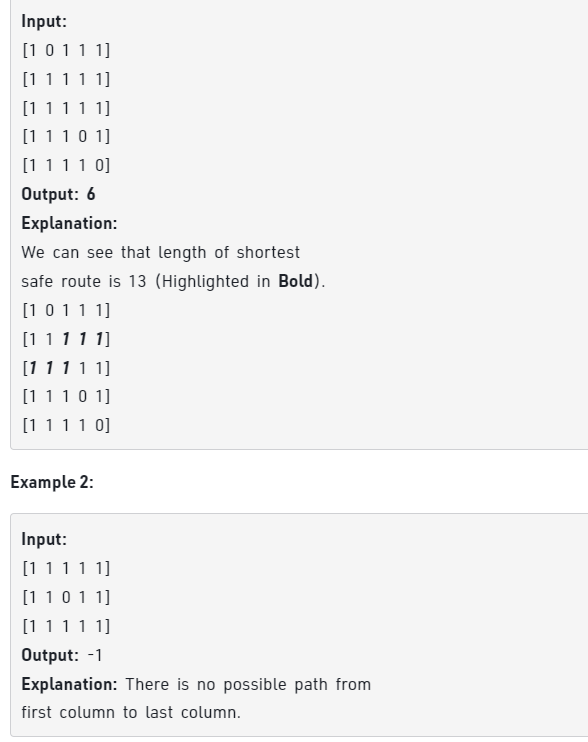

In [60]:
# TLE Approach

from typing import List

class Solution:
    ans = None

    def findShortestPath(self, mat: List[List[int]]) -> int:
        global ans 
        ans = 9999999
        n = len(mat)
        m = len(mat[0])
        
        
        mat1 = [[0 for _ in range(m)] for _ in range(n)]
        
        for i in range(n):
            for j in range(m):
                
                mat1[i][j] = mat[i][j]
                
        for i in range(n):
            for j in range(m):
                
                if mat[i][j] == 0:
                    
                    if 0 <= i < n - 1:
                        mat1[i+1][j] = 0
                    
                    if 0 < i <= n - 1:
                        mat1[i-1][j] = 0 
                    
                    if 0 <= j < m - 1:
                        mat1[i][j+1] = 0
                    
                    if 0 < j <= m - 1:
                        mat1[i][j-1] = 0
                        
        moves = [(0, 1), (1, 0), (-1, 0), (0, -1)]
        
        for j in range(m):
            count = 0
            for i in range(n):
                
                if mat[i][j] == 0:
                    count += 1
            
            if count == n:
                return -1
                
        visited = [[False for _ in range(m)] for _ in range(n)]
    
        for i in range(n):
            if mat[i][0] == 1 :
                self.solver(mat1, i, 0, 1, moves, visited)
        
        if ans == 9999999:
            return -1

        return ans
    
    def solver(self, mat, i, j, count, moves, visited):
        global ans
        
        if mat[i][j] == 0:
            return 
        
        if j == len(mat[0]) - 1 and mat[i][j] == 1:
            ans = min(ans, count)
            return
        
        visited[i][j] = True
        
        n = len(mat)
        m = len(mat[0])
        
        if i + 1 < n and mat[i+1][j] != 0 and visited[i+1][j] == False:
            self.solver(mat, i+1, j, count+1, moves, visited)
        
        if j+1 < m and mat[i][j+1] != 0 and visited[i][j+1] == False:
            self.solver(mat, i, j+1, count+1, moves, visited)
        
        if 0 <= i-1 and mat[i-1][j] != 0 and visited[i-1][j] == False:
            self.solver(mat, i-1, j, count+1, moves, visited)
        
        if 0<= j-1 and mat[i][j-1] != 0 and visited[i][j-1] == False:
            self.solver(mat, i, j-1, count+1, moves, visited)
        
        visited[i][j] = False
        
        return 

# Combination Sum

Given an array of integers and a sum B, find all unique combinations in the array where the sum is equal to B. The same number may be chosen from the array any number of times to make B.

Note:
        1. All numbers will be positive integers.
        2. Elements in a combination (a1, a2, …, ak) must be in non-descending order. (ie, a1 ≤ a2 ≤ … ≤ ak).
        3. The combinations themselves must be sorted in ascending order.

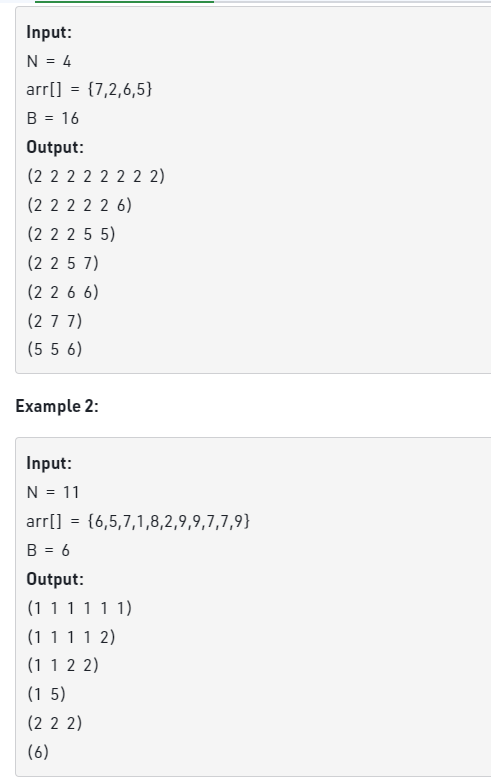

In [62]:
def find_combinations(arr, target, index, current_combination, result):
    # If the target sum becomes 0, we've found a valid combination
    if target == 0:
        result.append(tuple(current_combination))
        return
    
    for i in range(index, len(arr)):
        if arr[i] > target:
            # If the current element is greater than the remaining target, stop searching
            break
        
        current_combination.append(arr[i])  # Add the current element to the combination
        # Recursively search for combinations with the updated target and index
        find_combinations(arr, target - arr[i], i, current_combination, result)
        current_combination.pop()  # Backtrack: Remove the last element to explore other possibilities

class Solution:
    def combinationalSum(self, A, B):
        A = list(set(A))  # Remove duplicates from the input array
        A.sort()          # Sort the array in non-decreasing order
        result = []
        find_combinations(A, B, 0, [], result)  # Start the recursive search
        return result


# Subset Sum - II
You are given an integer array nums that may contain duplicates. Your task is to return all possible subsets. Return only unique subsets and they can be in any order.

Note: The individual subsets should be sorted.


In [63]:
class Solution:
    map1 = None
    i = None
    
    def printUniqueSubset(self, nums):
        global map1, i
        i = 0
        nums.sort()  # Sort the input array to ensure subsets are sorted
        
        map1 = {}
        path = []
        
        ans = [[]]  # Initialize the result with an empty list (empty subset)
        
        self.solver(nums, 0, path)  # Start the recursive search
        
        for key in map1.keys():
            ans += [list(key)]  # Convert keys (subsets) back to lists and add to the result
        
        ans.sort()  # Sort the final result in ascending order
        return ans
    
    def solver(self, nums, idx, path):
        global map1, i
        
        if len(path) > 0 :
            map1[tuple(path)] = i  # Store the current subset as a tuple in the map with an index
            i += 1
        
        if idx == len(nums):
            return  # Base case: When we reach the end of the array, stop recursion
        
        self.solver(nums, idx + 1, path)  # Exclude the current element and move to the next
        path += [nums[idx]]  # Include the current element in the subset
        self.solver(nums, idx + 1, path)  # Recurse with the current element in the subset
        path.pop()  # Backtrack: Remove the last element to explore other possibilities

        return


# Largest Number in K swaps ---- VVV Impo
Given a number K and string str of digits denoting a positive integer, build the largest number possible by performing swap operations on the digits of str at most K times.



In [2]:
class Solution:

    # Recursive function to find the largest number after k swaps.
    def solve(self, string, k, index, maxi):
        # Base cases:
        # 1. If no more swaps are allowed or we've reached the end of the string, stop recursion.
        if k <= 0 or index >= len(string) - 1:
            return
        
        # Find the maximum digit in the remaining part of the string.
        max_ = string[index]
        
        for i in range(index+1, len(string)):
            if int(max_)<int(string[i]):
                max_=string[i]        
        
        # If the current digit is not the maximum, decrement k.
        if string[index] != max_:
            k -= 1

        # Iterate through the string from the current index.
        for i in range(index, len(string)):
            
            if max_ == string[i]:
                # Swap the current digit with max_.
                string[index], string[i] = string[i], string[index]
                new_str = "".join(string)
                
                # If the new string is greater than the maximum so far, update maxi.
                if int(new_str) > int(maxi[0]):
                    maxi[0] = new_str
                
                # Recursively call solve with the updated string, reduced k, and incremented index.
                self.solve(string, k, index + 1, maxi)
                
                # Revert the swap to explore other possible swaps.
                string[index], string[i] = string[i], string[index]

    # Function to find the largest number after k swaps.
    def findMaximumNum(self, s, k):
        # Initialize maxi to the input string.
        maxi = [s]
        # Convert the input string into a list of characters for easier manipulation.
        string = [char for char in s]
        index = 0
        # Start the recursive process to find the maximum number.
        self.solve(string, k, index, maxi)
        # Return the maximum number found after all swaps.
        return maxi[0]

# Print All the permutations of a String/Array ----- VVVVVV Impo-----------------

Given a string S. The task is to print all unique permutations of the given string in lexicographically sorted order.
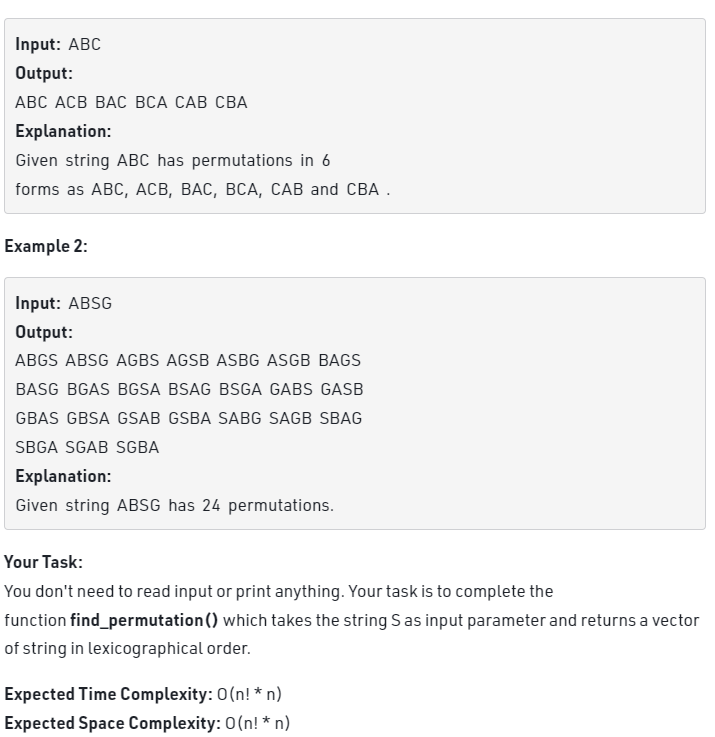

In [4]:
from collections import defaultdict

class Solution:
    
    def find_permutation(self, S):
        # Initialize a dictionary to store the count of each character in the input string.
        map1 = defaultdict(int)
        
        # Convert the input string into a list of characters for easier manipulation.
        arr = [item for item in S]
        
        # Initialize a set to store unique permutations.
        numbers = set()
        # Initialize a list to temporarily store a permutation.
        no = []
        
        # Count the occurrences of each character in the input string.
        for item in arr:
            if item in map1:
                map1[item] += 1
            else:
                map1[item] = 1
        
        # Start the recursive process to generate permutations.
        self.solve(no, numbers, arr, map1)
        
        # Convert the set of unique permutations to a list and return it.
        nums = list(numbers)
        return nums
    
    def solve(self, no, numbers, arr, map1):
        # Base case: If the length of the permutation is equal to the length of the input string, add it to the set.
        if len(no) == len(arr):
            numbers.add("".join(no))
            return
        
        # Generate permutations recursively.
        for i in range(len(arr)):
            if map1[arr[i]] > 0:
                no.append(arr[i])
                map1[arr[i]] -= 1
                
                self.solve(no, numbers, arr, map1)
                
                # Revert the changes to explore other permutations.
                map1[arr[i]] += 1
                no.pop()

# Example usage:
solution = Solution()
result = solution.find_permutation("ABC")
print(sorted(result))  # Output: ['ABC', 'ACB', 'BAC', 'BCA', 'CAB', 'CBA']

['ABC', 'ACB', 'BAC', 'BCA', 'CAB', 'CBA']


# --------------Solved By - Suraj------------------ 